# <h1><center>DESCRIPTIVE ANALYSIS</center></h1>

The purpose of this notebook is both describing the basic stats of the data we have used and show how the data subsets has been extracted from the main datasources in order to analyze them in the different notebooks created for this report.<br>

**Main datasources (Yelp):**

   - Business: Contains business data including location data, attributes, and categories.
   - Reviews: Contains full review text data including the user_id that wrote the review and the business_id the review is written for.
   - User: User data including the user's friend mapping and all the metadata associated with the user.

**Subsets of data used for this report:**
    
   - cleaned_restaurants.csv: Contains all the restaurants in Yelp's dataset but with attributes extracted into  columns in order to prepare it for the deep learning model.
   - reviews_bahnmi.csv
   - reviews_rest_phoenix_metropolis.csv
   - reviews_rest_toronto.csv
   - Business-metropolis.csv
   - user_phoenix.csv

### cleaned_restaurants.csv Dataset

It is used for several analysis in this report. Specially for the deep learning model used to analyse important features for success of a restaurant, it is explained in chapter 5.3 of the report.

In [1]:
import pandas as pd
import folium
from folium import plugins
from folium.plugins import HeatMap
import numpy as np
import matplotlib.pyplot as plt
import ast

Basically we load the business dataset provided by yelp and filter it by restaurants. After we extract analyze and extract all the important attributes for the model and format them into binary variables.

In [2]:
business=pd.read_json('yelp_academic_dataset_business.json',lines=True)
business=business[business['categories'].notnull()==True]
restaurants=business[business['categories'].str.contains('Restaurants')]

p=0
keys=[]
attri=restaurants.copy()
attri=attri.dropna()
attri=attri.reset_index()

for w in range(0,len(attri)):
    
    keysi=list(attri['attributes'][w].keys())
    for k in keysi:
         if k not in keys:
            keys.append(k)
            
print('There are ',len(keys),' different attributes in total.')
for l in keys:
    l=[]
    for a in attri['attributes']:
        if l in list(a.keys()):
            l.append(a)
        else:
            l.append('na')

#attri=pd.concat([attri.drop(['attributes'], axis=1), attri['attributes'].apply(pd.Series)], axis=1)
attributes_restaurants=attri['attributes'].apply(pd.Series)
attributes_restaurants['index']=attri['index']
#ambiences=pd.DataFrame(attri['Ambience'].apply(pd.Series))






print('Total length:',len(attributes_restaurants))
print('The following table shows the representativity of every attribute in the dataset.')
(attributes_restaurants.isnull().sum()/-len(attributes_restaurants)+1).sort_values(ascending=False)
        

There are  39  different attributes in total.
Total length: 49947
The following table shows the representativity of every attribute in the dataset.


index                         1.000000
RestaurantsTakeOut            0.914429
BusinessParking               0.889102
RestaurantsDelivery           0.882355
RestaurantsReservations       0.880894
RestaurantsPriceRange2        0.880393
RestaurantsGoodForGroups      0.854786
Ambience                      0.853685
OutdoorSeating                0.849480
GoodForKids                   0.847719
HasTV                         0.841232
RestaurantsAttire             0.801990
Alcohol                       0.783891
WiFi                          0.758024
BikeParking                   0.720544
NoiseLevel                    0.718402
Caters                        0.666006
GoodForMeal                   0.633792
BusinessAcceptsCreditCards    0.603980
RestaurantsTableService       0.383787
HappyHour                     0.245260
WheelchairAccessible          0.224878
DogsAllowed                   0.202955
Music                         0.108695
BusinessAcceptsBitcoin        0.084129
BestNights               

From this list we can see that several attributes are not representative enough to include them in our model. Therefore we will remove those with a representativity bellow 25% (0.25)

In [3]:
List_attributtes=[]
attributtes=attributes_restaurants.columns
number=0
for i in attributes_restaurants.isnull().sum():
    if 1-i/len(restaurants) > 0.25:
        List_attributtes.append(attributtes[number])
    number=number+1

In [4]:
interesting_attributes=attributes_restaurants[List_attributtes]

In [5]:
interesting_attributes=interesting_attributes.fillna(0)

In [6]:
interesting_attributes = interesting_attributes.replace('None', 0)

interesting_attributes = interesting_attributes.replace("u'casual'", "'casual'")
interesting_attributes = interesting_attributes.replace("u'formal'", "'formal'")
interesting_attributes = interesting_attributes.replace("u'dressy'", "'dressy'")

interesting_attributes = pd.get_dummies(interesting_attributes,prefix = ['RestaurantsAttire'], columns=['RestaurantsAttire'])

In [7]:
del interesting_attributes["RestaurantsAttire_0"]

In [8]:
interesting_attributes = interesting_attributes.replace('True', 1)
interesting_attributes = interesting_attributes.replace('False', 0)

Specially for the attributes of "Noise Level" and "Alcohol" we set a scale from -1 to 2 in the case of "Noise Level" and from 0 to 2 in the case of "Alcohol" as follows:

In [9]:
interesting_attributes = interesting_attributes.replace("u'quiet'", -1)
interesting_attributes = interesting_attributes.replace("'quiet'", -1)

interesting_attributes = interesting_attributes.replace("u'average'", 0)
interesting_attributes = interesting_attributes.replace("'average'", 0)

interesting_attributes = interesting_attributes.replace("u'loud'", 1)
interesting_attributes = interesting_attributes.replace("'loud'", 1)

interesting_attributes = interesting_attributes.replace("u'very_loud'", 2)
interesting_attributes = interesting_attributes.replace("'very_loud'", 2)

In [10]:
interesting_attributes = interesting_attributes.replace("'none'", 0)
interesting_attributes = interesting_attributes.replace("u'none'", 0)

interesting_attributes = interesting_attributes.replace("u'full_bar'",2)
interesting_attributes = interesting_attributes.replace("'full_bar'",2)

interesting_attributes = interesting_attributes.replace("u'beer_and_wine'",1)
interesting_attributes = interesting_attributes.replace("'beer_and_wine'",1)

In [11]:
interesting_attributes = interesting_attributes.replace("u'no'", "'no'")
interesting_attributes = interesting_attributes.replace("u'free'", "'free'")
interesting_attributes = interesting_attributes.replace("u'paid'","'paid'")

In [12]:
interesting_attributes = pd.get_dummies(interesting_attributes,prefix = ['WiFi'], columns=['WiFi'])

In [13]:
del interesting_attributes["WiFi_0"]

As the attributes Ambience, BusinessParking and GoodForMeal contains again a dictionary type. We extract those values and put them as new columns for the dataset.

In [14]:
at=[]
for d in interesting_attributes.Ambience:

    if str(d)=='0':
        at.append(d)

    else:
        at.append(ast.literal_eval(d))
interesting_attributes['Ambience']=at

In [15]:
at=[]
for d in interesting_attributes.BusinessParking:

    if str(d)=='0':
        at.append(d)

    else:
        at.append(ast.literal_eval(d))
interesting_attributes['BusinessParking']=at

In [16]:
at=[]
for d in interesting_attributes.GoodForMeal:

    if str(d)=='0':
        at.append(d)

    else:
        at.append(ast.literal_eval(d))
interesting_attributes['GoodForMeal']=at

In [17]:
interesting_attributes=pd.concat([interesting_attributes.drop(['Ambience'], axis=1), interesting_attributes['Ambience'].apply(pd.Series)], axis=1)
interesting_attributes=pd.concat([interesting_attributes.drop(['BusinessParking'], axis=1), interesting_attributes['BusinessParking'].apply(pd.Series)], axis=1)
interesting_attributes=pd.concat([interesting_attributes.drop(['GoodForMeal'], axis=1), interesting_attributes['GoodForMeal'].apply(pd.Series)], axis=1)

In [18]:
del interesting_attributes[0]

In [19]:
interesting_attributes = interesting_attributes.fillna(0)
interesting_attributes = interesting_attributes.replace('None', 0)
interesting_attributes = interesting_attributes.replace(True, 1)
interesting_attributes = interesting_attributes.replace(False, 0)


In [20]:
interesting_attributes.head()

,RestaurantsTakeOut,BusinessAcceptsCreditCards,NoiseLevel,GoodForKids,RestaurantsReservations,RestaurantsGoodForGroups,RestaurantsPriceRange2,HasTV,Alcohol,BikeParking,...,lot,street,valet,validated,breakfast,brunch,dessert,dinner,latenight,lunch
0,1,1,-1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,1,2,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
print('Finally we get a dataset with ',len(interesting_attributes),' rows and ',len(interesting_attributes.columns),' columns of the attributes.')

Finally we get a dataset with  49947  rows and  52  columns of the attributes.


Now we merge it again with the restaurants dataset dropping the attributes 

In [22]:
cleaned_restaurants=pd.merge(interesting_attributes , attri , on=['index'],how='left')

In [23]:
cleaned_restaurants.head()

,RestaurantsTakeOut,BusinessAcceptsCreditCards,NoiseLevel,GoodForKids,RestaurantsReservations,RestaurantsGoodForGroups,RestaurantsPriceRange2,HasTV,Alcohol,BikeParking,...,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,1,1,-1,0,0,0,1,1,0,0,...,Champaign,"{'Monday': '11:30-14:30', 'Tuesday': '11:30-14...",1,40.110446,-88.233073,The Empanadas House,61820,5,4.5,IL
1,1,0,0,0,0,0,0,1,0,1,...,Aurora,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,44.010962,-79.448677,Philthy Phillys,L4G 7J1,4,4.5,ON
2,1,0,0,0,1,0,0,1,2,0,...,Richmond Hill,"{'Tuesday': '12:0-21:0', 'Wednesday': '12:0-21...",1,43.947011,-79.454862,Apadana Restaurant,L4E 1A5,3,3.0,ON
3,1,1,0,1,0,1,1,0,0,1,...,Phoenix,"{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",1,33.602822,-111.983533,Wetzel's Pretzels,85032,10,4.0,AZ
4,1,1,0,0,0,0,0,1,0,1,...,Cleveland,"{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",1,41.512155,-81.663332,Pho Lee's Vietnamese Restaurant,44114,23,4.5,OH


This is the final dataset we use for the analysis performed within this report.

## Basic stats about this dataset

This dataset contains all different restaurants with their respective attributes. Basics stats are showed during this part to discover the distribution of the different features.

Let's start visualizing the dataset in a map:

In [24]:
cities=cleaned_restaurants[['state','city']].groupby(['state','city']).count()
cities=cities.reset_index(level=['city'])
BusinessesByCity=(business.groupby(['state','city']).count()).business_id
BusinessesByCity=pd.DataFrame(BusinessesByCity)
BusinessesByCity=BusinessesByCity.rename(columns={'business_id': 'Number of businesses'})
BusinessesByCity=BusinessesByCity.reset_index(level=['state'])
BusinessesByCity=BusinessesByCity.reset_index(level=['city'])
business_cities=BusinessesByCity.sort_values(by=['Number of businesses','Number of businesses'],ascending=False).reset_index(drop = True)
business_cities_save=business_cities
lat= business.groupby(['city','state'])['latitude'].mean().reset_index()
long= business.groupby(['city','state'])['longitude'].mean().reset_index()
cities=business_cities
citiesm=cities.merge(lat, on=['city', 'state'])
citiesm=citiesm.merge(long,on=['city', 'state'])




In [25]:
Interesting_City=citiesm


In [26]:
    
Interesting_City['radius'] = pd.cut(Interesting_City['Number of businesses'], bins=20, 
                              labels=['1', '2', '3', '4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])
Interesting_City['color'] = pd.cut(Interesting_City['Number of businesses'], bins=5, 
                              labels=['blue', 'green', 'yellow', 'red','black'])

# Kansas location
lat_SF = 38.5
lon_SF = -98

map_SF = folium.Map([lat_SF, lon_SF], zoom_start=4)
business_pa=Interesting_City.copy()
for index, row in business_pa.iterrows():
        lon = row['longitude']
        lat = row['latitude']
        popup_str = row['city']

    # Circle marker
        folium.CircleMarker([lat, lon],
                            radius=row['radius'],
                            popup=popup_str,
                            color=row['color'],
                            ).add_to(map_SF)

map_SF

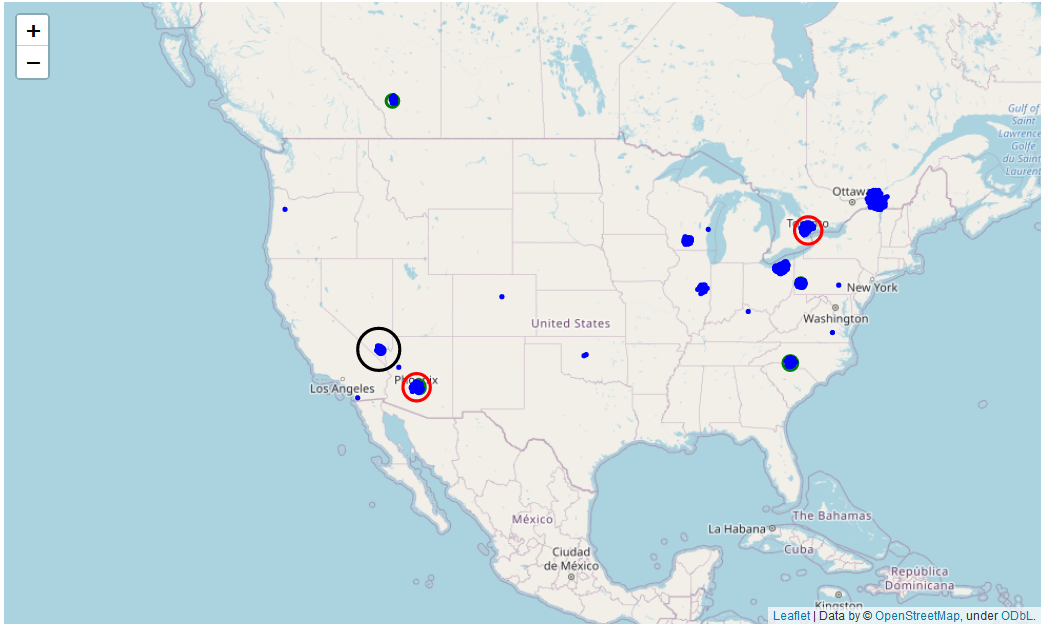

In [72]:
from IPython.display import Image
Image("C:/Users/hecto.DESKTOP-ACA6A3T/Documents/DENMARK/BANALYTICS/2semester/Advance BA/Final Project/FINAL FILES/Metropolis_1.PNG")

By looking at the map we can see that our dataset is mainly formed by some US and Canadian cities. They also show that they are mainly grouped in around 10 big metropolis.

In [27]:
print('In this dataset there are ',len(cleaned_restaurants.city.unique()), " different cities represented. Let's take a look at the top 10.")

In this dataset there are  717  different cities represented. Let's take a look at the top 10.


### RESTAURANTS DISTRIBUTION BY CITY

Text(0.5, 0, 'City')

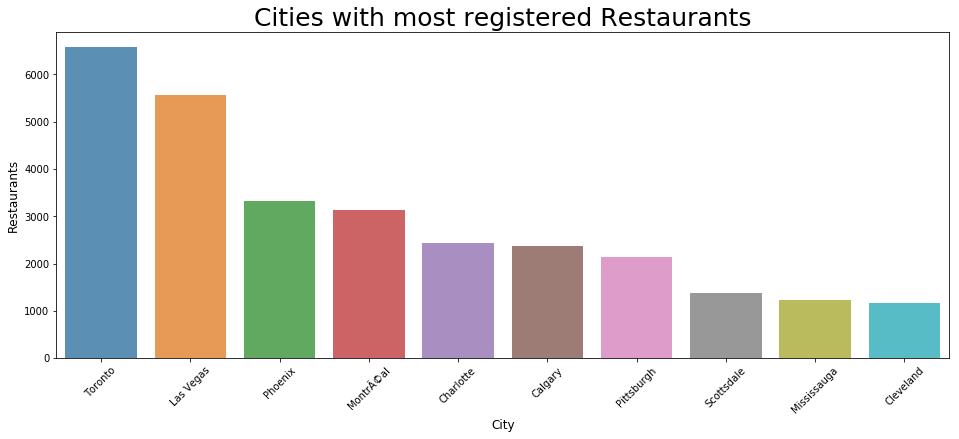

In [28]:
import seaborn as sns

x = cleaned_restaurants['city'].value_counts()
x = x.sort_values(ascending=False)
cities_order = x.index.tolist()
x=x[x.values>1100]



plt.figure(figsize=(16,6))

ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Cities with most registered Restaurants", fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('Restaurants', fontsize=12)
plt.xlabel('City', fontsize=12)

### CATEGORIES DISTRIBUTION BY CITY

In [29]:
top_cities=x.index

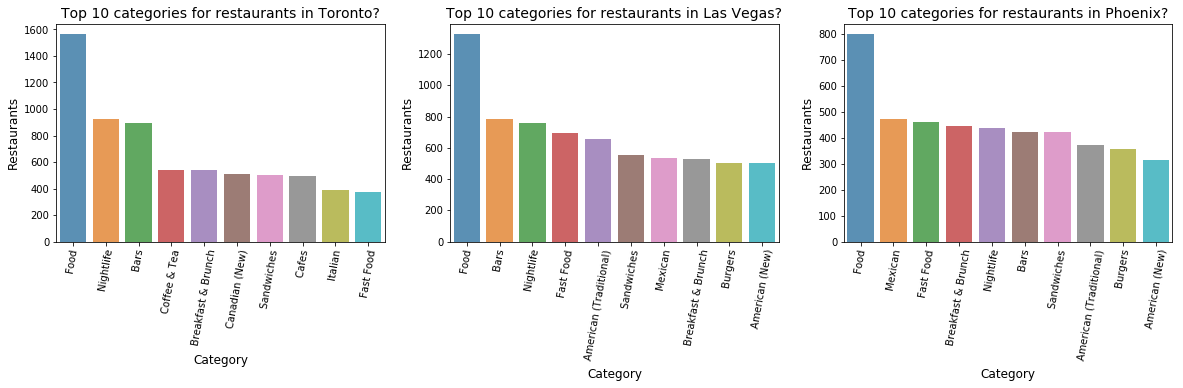

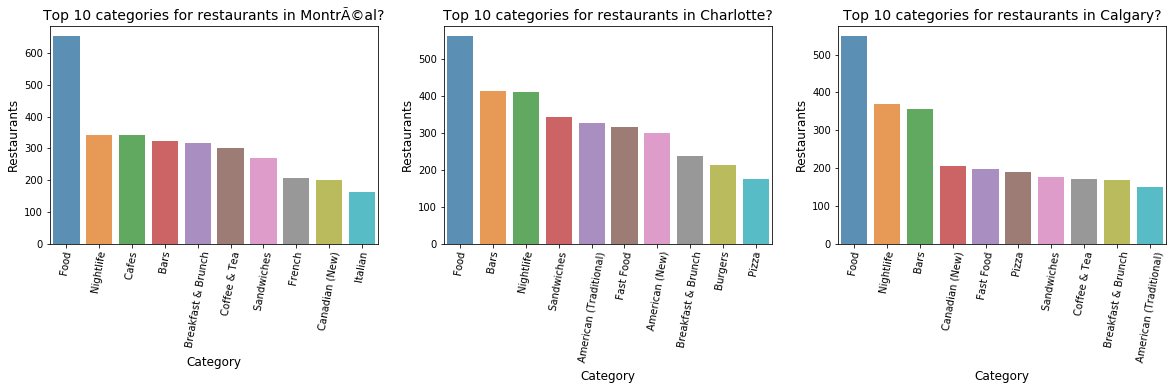

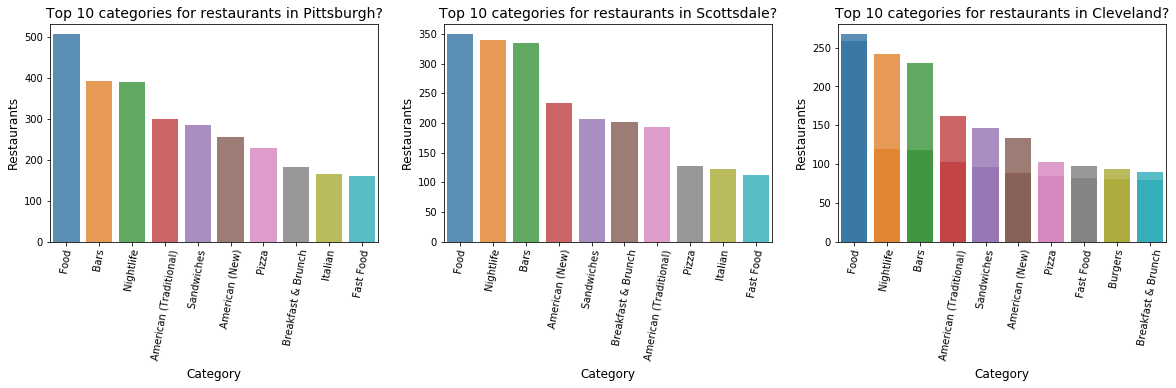

In [30]:
from collections import Counter
cd=cleaned_restaurants.copy()
cd
p=0
for city in top_cities:
    p=p+1
    cd=cleaned_restaurants[cleaned_restaurants['city']==city]
    cat=[]
    for c in cd.categories:
        sp=c.split(',')
        for s in sp:
            
                cat.append(s)
    
    list_count=Counter(cat).most_common()[2:12]
    categories=[]
    values=[]
    for l in range(0,len(list_count)):
        categories.append(list_count[l][0])
        values.append(list_count[l][1])
        
    if p==1:
        fig, ax = plt.subplots(1,3, figsize=(20,4),sharey=False)
    elif p==4:
        fig, ax = plt.subplots(1,3, figsize=(20,4),sharey=False)
    elif p==7:
        fig, ax = plt.subplots(1,3, figsize=(20,4),sharey=False)
    
    if (p==1)|(p==4)|(p==7):
        
        column=0
    elif (p==2)|(p==5)|(p==8):
        column=1
    else:
        column=2
    
    current_ax = ax[column]


    sns.barplot(categories, values, alpha=0.8, ax=current_ax)
    current_ax.set_title("Top 10 categories for restaurants in {}?".format(str(city)),fontsize=14)
    plt.setp(current_ax.get_xticklabels(), rotation=80)
    current_ax.set_ylabel('Restaurants', fontsize=12)
    current_ax.set_xlabel('Category', fontsize=12)



### RATINGS DISTRIBUTION BY CITY

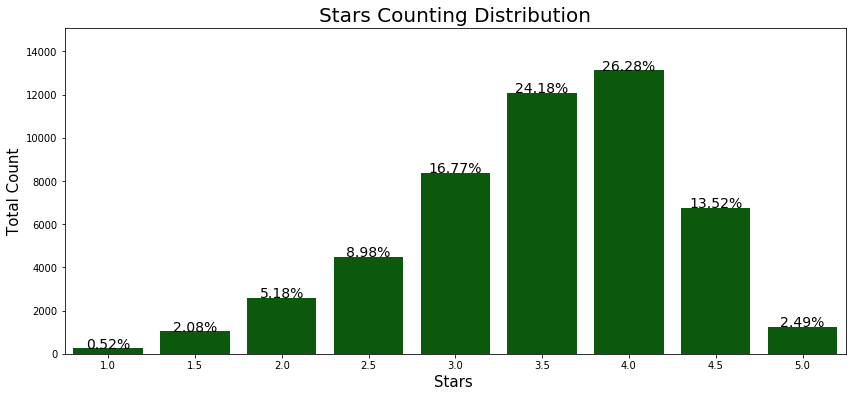

In [31]:

total = len(cleaned_restaurants)
plt.figure(figsize=(14,6))

g = sns.countplot(x='stars', color='darkgreen',
                  data=cleaned_restaurants)
g.set_title("Stars Counting Distribution", fontsize=20)
g.set_xlabel("Stars ", fontsize=15)
g.set_ylabel("Total Count", fontsize=15)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.15)

plt.show()

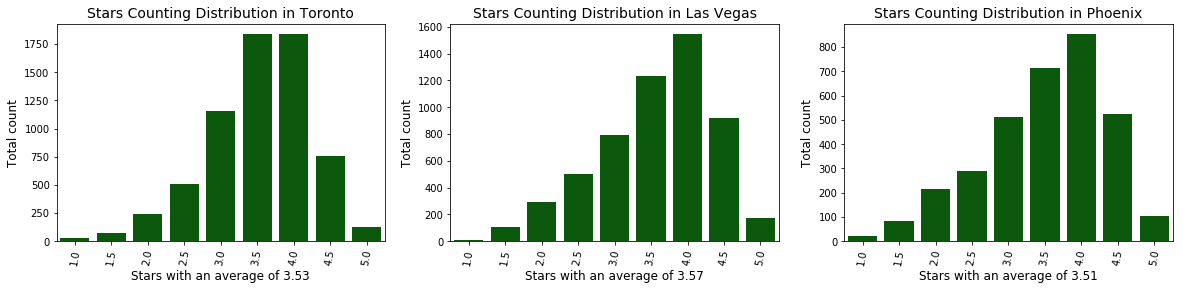

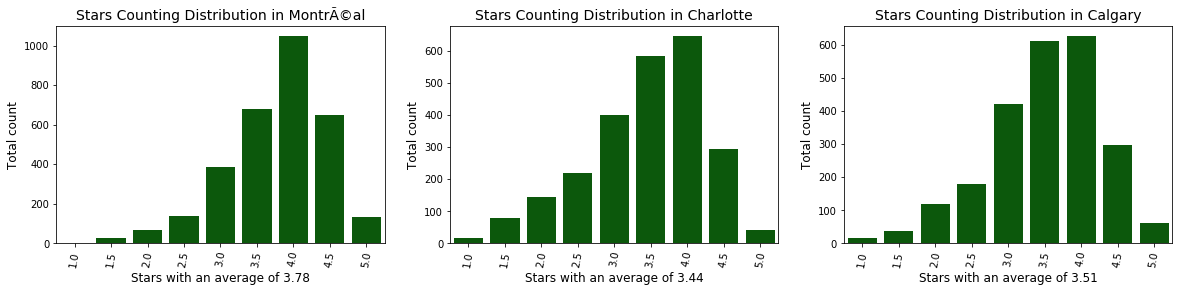

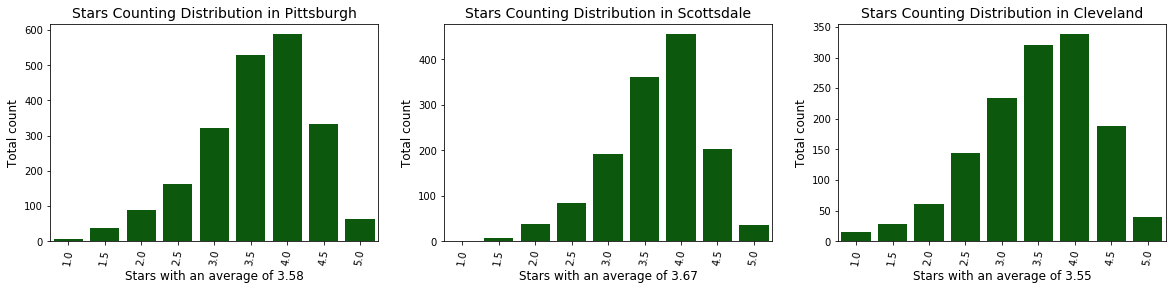

In [32]:
cd=cleaned_restaurants.copy()
p=0
for city in top_cities:
    p=p+1
    cd=cleaned_restaurants[cleaned_restaurants['city']==city]
        
    if p==1:
        fig, ax = plt.subplots(1,3, figsize=(20,4),sharey=False)
    elif p==4:
        fig, ax = plt.subplots(1,3, figsize=(20,4),sharey=False)
    elif p==7:
        fig, ax = plt.subplots(1,3, figsize=(20,4),sharey=False)
    
    if (p==1)|(p==4)|(p==7):
        
        column=0
    elif (p==2)|(p==5)|(p==8):
        column=1
    else:
        column=2
    
    current_ax = ax[column]


    sns.countplot(x='stars', color='darkgreen',ax=current_ax,
                  data=cd)
    current_ax.set_title("Stars Counting Distribution in {}".format(str(city)),fontsize=14)
    plt.setp(current_ax.get_xticklabels(), rotation=80)
    current_ax.set_ylabel('Total count', fontsize=12)
    current_ax.set_xlabel('Stars with an average of {}'.format(str(round(cd['stars'].mean(),2))), fontsize=12)


# Filter on the metropolis

As we can see from the dataset, there are many cities but there are few important Metropolis surrounded by other small cities. Therefore now we will focus on the following cities:
    - Las Vegas, NV
    - Toronto, ON
    - Phoenix, AZ
    - Charlotte, NC
    - Calgary, AB
    - Pittsburgh, PA
    - MontrÃ©al, QC
    - Cleveland, OH
    - Madison, WI

We will call these 8 cities the main metropolis of our datasets, as we have seen in the map, mostly all of the cities in the dataset belong to the region of one of this nine metropolis.

In [33]:
metropolis=citiesm[citiesm['city'].isin(['Las Vegas','Toronto','Phoenix','Charlotte','Calgary','Pittsburgh','MontrÃ©al','Cleveland','Madison'])]
metropolis=metropolis.reset_index(drop = True)
metropolis=metropolis.head(9)

citiesm is the data frame with all of our cities and metropolis is the data frame with our nine metropolis

In [34]:
lat=citiesm['latitude']
long= citiesm['longitude']
Vector_metropolis=[]

lat_metropolis=metropolis['latitude']
long_metropolis=metropolis['longitude']
city_metropolis=metropolis['city']


Vector_distance=[]

As we have seen on the map, Cleveland and Pittburh are the two metropolis that are the closest to each other, around 180 kilometers.

In [35]:
# parameters: the nimber of kilometers of the radius of earth

r=6371

There are many way to have access to the distance between two points when we have their longitude and latitude. We used the one using the law of sinus.


In [36]:
distance_closest_metropolis=r* np.arccos ( np.sin( lat_metropolis[5]*np.pi/180 )*np.sin( lat_metropolis[7]*np.pi/180 ) + np.cos( lat_metropolis[5]*np.pi/180 )*np.cos( lat_metropolis[7]*np.pi/180 )*np.cos((long_metropolis[5]-long_metropolis[7])*np.pi/180))


print(distance_closest_metropolis)

182.57690010240614


We have 182 kilometers for the distance between Cleveland and Pittburh

For each city, we will calculate the minimum distance between this city and the metropolis

At the end, we will have, the city, his metropolis and the distance from the city to the metropolis. If the distance is more than 90 kilometers (half of the distance between Cleveland and Pittburh) we can conclude that the city doesn't belong to one of our metropolises.

And we will delete this city from our dataset

In [37]:
for i in range (len(lat)):
    x=lat[i]
    y=long[i]
    indic =0
    mini=r* np.arccos ( np.sin( lat_metropolis[0]*np.pi/180 )*np.sin(x*np.pi/180 ) + np.cos( lat_metropolis[0]*np.pi/180 )*np.cos( x*np.pi/180 )*np.cos((long_metropolis[0]-y)*np.pi/180))
    for j in range (1,len(lat_metropolis)):

        distance=r* np.arccos ( np.sin( lat_metropolis[j]*np.pi/180 )*np.sin(x*np.pi/180 ) + np.cos( lat_metropolis[j]*np.pi/180 )*np.cos( x*np.pi/180 )*np.cos((long_metropolis[j]-y)*np.pi/180))
        
        if distance < mini:
            indic=j
            mini=distance
            
    Vector_metropolis.append(city_metropolis[indic])
    Vector_distance.append(mini)

Unfortunately, as we have seen in the map some cities (but a few) are far from our metropolis.

In [38]:
print(max(Vector_distance))

4436.250068521636


(array([746., 416., 100.,   7.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   8.,  10.,   7.,   2.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

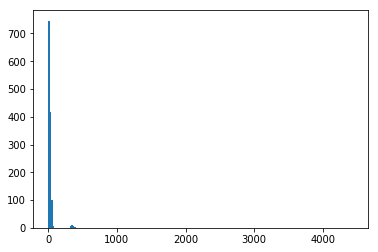

In [39]:
plt.hist(Vector_distance,bins=200)

We have:
    - 748 cities that are between 0 and 22 km to their metropolis.
    - 416 cities that are between 22 and 44 km to their metropolis.
    - 99 cities that are between 44 and 66 km to their metropolis.
    - 7 cities between 66 and 88 km.

In [40]:
citiesm['metropolis']=Vector_metropolis
citiesm['distance metropolis']=Vector_distance

In [41]:
print(len(citiesm[citiesm['distance metropolis']<90])/len(citiesm))

0.9724137931034482


We have 97% of our cities that are inside these 8 metropolis.

In [42]:
new_citiesm=citiesm.loc[:,['city','state','metropolis','distance metropolis']]

In [43]:
new_business=cleaned_restaurants.merge(new_citiesm, on=['city', 'state'])

In [44]:
new_business.head()

,RestaurantsTakeOut,BusinessAcceptsCreditCards,NoiseLevel,GoodForKids,RestaurantsReservations,RestaurantsGoodForGroups,RestaurantsPriceRange2,HasTV,Alcohol,BikeParking,...,is_open,latitude,longitude,name,postal_code,review_count,stars,state,metropolis,distance metropolis
0,1,1,-1,0,0,0,1,1,0,0,...,1,40.110446,-88.233073,The Empanadas House,61820,5,4.5,IL,Madison,342.589185
1,1,1,1,1,0,1,1,1,0,1,...,0,40.118133,-88.242900,Merry Ann's Diner,61820,47,3.0,IL,Madison,342.589185
2,1,1,0,1,0,1,1,0,0,1,...,1,40.112515,-88.271575,BoBo's BBQ,61821,45,3.5,IL,Madison,342.589185
3,1,1,0,1,0,0,1,1,0,1,...,1,40.099648,-88.244768,Cactus Grill,61820,60,4.0,IL,Madison,342.589185
4,1,1,0,0,1,1,2,1,2,1,...,0,40.119039,-88.243882,Dublin O'Neil's,61820,130,3.5,IL,Madison,342.589185


In [45]:
new_business[new_business['distance metropolis']<90]['metropolis'].value_counts()


Toronto       12094
Phoenix        9824
Las Vegas      6728
Cleveland      4717
MontrÃ©al      4564
Charlotte      4144
Pittsburgh     3399
Calgary        2454
Madison        1485
Name: metropolis, dtype: int64

In [46]:
new_business.to_excel('Business-Metropolis.xlsx', index = False)

# reviews_bahnmi.csv, reviews_rest_phoenix_metropolis.csv, reviews_rest_toronto.csv datasets

This datasets come from the reviews.json dataset from Yelp. As it takes too much memory to load, we loaded and save it into these datasets using the following code:

#### For Toronto

In [47]:
cleaned_restaurants=pd.read_csv('cleaned_restaurants.csv')
torontof=cleaned_restaurants[cleaned_restaurants['city']=='Toronto']['business_id']

In [48]:

reviews=pd.read_json('yelp_academic_dataset_review.json',lines=True,chunksize=10000)
l=0

for chunk in reviews:
    if l==0:
        revf = chunk  
        revf=revf.merge(torontof, on='business_id', how='inner')
        revf=revf.dropna()
    elif l==1:
        #torontof=torontof.append(torontof)
        rev = chunk  
        rev=rev.merge(torontof, on='business_id', how='inner')
        rev=rev.dropna()
    else:
        revf=revf.append(rev)
        rev = chunk  
        rev=rev.merge(torontof, on='business_id', how='inner')
        rev=rev.dropna()
    l=l+1

revf=revf.append(rev)  


In [49]:
#We save it to a csv file
#revf.to_csv('reviews_rest_toronto.csv')

In [50]:
revf.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,qUWqjjjfpB2-4P3He5rsKw,0,2017-06-06 19:04:10,0,mM8i91yWP1QbImEvz5ds0w,4,"In the heart of Chinatown, I discovered it enr...",0,TZQSUDDcA4ek5gBd6BzcjA
1,9Eghhu_LzEJgDKNgisf3rg,0,2016-08-25 16:25:12,0,nAm92_-WUQ084x9Uz9iFmA,3,Was super excited to bring my boyfriend to thi...,0,iFEM16O5BeKvf_AHs6NzUQ
2,9Eghhu_LzEJgDKNgisf3rg,2,2016-03-30 22:19:07,2,RaoWgOw66l7LCendPEDivg,4,My second visit here was much better because I...,2,zWWcik1fRPZviBCQLC26FQ
3,9Eghhu_LzEJgDKNgisf3rg,0,2017-11-06 20:26:32,0,O9bxSBKvB2MEbPNyW0f29g,5,I went here for my birthday. It was my first ...,0,leDvTjYAq4DmaxaOjq8Jbg
4,9Eghhu_LzEJgDKNgisf3rg,0,2015-04-15 06:16:15,0,DCTPTcmjVais_xZBWKrhqw,4,This was my third time visiting this restauran...,0,nmI6LoOi0zvHaH7rwISRCw


##### For Phoenix

In [51]:
cleaned_restaurants=pd.read_csv('cleaned_restaurants.csv')
phoenixf=cleaned_restaurants[cleaned_restaurants['state']=='AZ']['business_id']

In [52]:

reviews=pd.read_json('yelp_academic_dataset_review.json',lines=True,chunksize=10000)
l=0

for chunk in reviews:
    if l==0:
        revfp = chunk  
        revfp=revfp.merge(phoenixf, on='business_id', how='inner')
        revfp=revfp.dropna()
    elif l==1:
        #phoenixf=phoenixf.append(phoenixf)
        rev = chunk  
        rev=rev.merge(phoenixf, on='business_id', how='inner')
        rev=rev.dropna()
    else:
        revfp=revfp.append(rev)
        rev = chunk  
        rev=rev.merge(phoenixf, on='business_id', how='inner')
        rev=rev.dropna()
    l=l+1

revfp=revfp.append(rev)    

In [53]:
#We save it to a csv file
#revfp.to_csv('reviews_rest_phoenix_metropolis.csv')

In [54]:
revfp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,Pthe4qk5xh4n-ef-9bvMSg,0,2015-11-05 23:11:05,0,ZayJ1zWyWgY9S_TRLT_y9Q,5,"Really good place with simple decor, amazing f...",1,aq_ZxGHiri48TUXJlpRkCQ
1,Pthe4qk5xh4n-ef-9bvMSg,0,2017-11-06 19:07:21,0,-zN-et1Klryec6ZNwXMtEA,5,Food was delicious and the staff was friendly ...,0,4kux7ad959LcfTy6usKpzA
2,Pthe4qk5xh4n-ef-9bvMSg,0,2016-07-14 19:44:04,0,F3Kavu3MeKvnEj4qlK7gYA,2,Went there yesterday with high expectations af...,0,lcDQPxJRR62T6hA8u4-aBA
3,Pthe4qk5xh4n-ef-9bvMSg,0,2017-05-13 13:46:48,0,oTfK6opDLRIBn-6NzsVBUg,5,My friend and I went to eat lunch last weekend...,0,iJAggBw5LzKC3JtLu4i7dQ
4,Pthe4qk5xh4n-ef-9bvMSg,0,2016-12-19 16:50:10,0,qNLYevmiLbfFKQCEMfY7aA,5,This was one of the best Thai food restaurants...,0,EU1pj1-1dpiHm-icIrun5A


### Basic stats for Toronto's reviews 

In [55]:
revf.dtypes

business_id            object
cool                    int64
date           datetime64[ns]
funny                   int64
review_id              object
stars                   int64
text                   object
useful                  int64
user_id                object
dtype: object

In [56]:
revf.describe()

,cool,funny,stars,useful
count,432479.000000,432479.000000,432479.000000,432479.000000
mean,0.483193,0.344773,3.628794,1.067488
std,1.883309,1.414334,1.281967,2.526520
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000
50%,0.000000,0.000000,4.000000,0.000000
75%,0.000000,0.000000,5.000000,1.000000
max,164.000000,193.000000,5.000000,160.000000


In [57]:
revf.isnull().sum()

business_id    0
cool           0
date           0
funny          0
review_id      0
stars          0
text           0
useful         0
user_id        0
dtype: int64

In [58]:
revf.shape

(432479, 9)

### LENGTH DISTRIBUTION AND TEMPORAL PATTERNS IN THE REVIEWS OF PHOENIX

In [59]:
revf['date']=pd.to_datetime(revf['date'])

In [60]:
result = [] 
for value in revf["text"]:
    result.append(len(value)) 
       
revf["length"] = result  

In [61]:


def length(points):
    if points in list(range(0,200)):
        return 'Very Short'
    elif points in list(range(200,500)):
        return 'Short'
    elif points in list(range(500,800)):
        return 'Medium'
    elif points in list(range(800,1100)):
        return 'Large'
    else:
        return 'Very large'

revf["length_cat"] = revf["length"].apply(length)


The average length of a review in Toronto is  660  characters


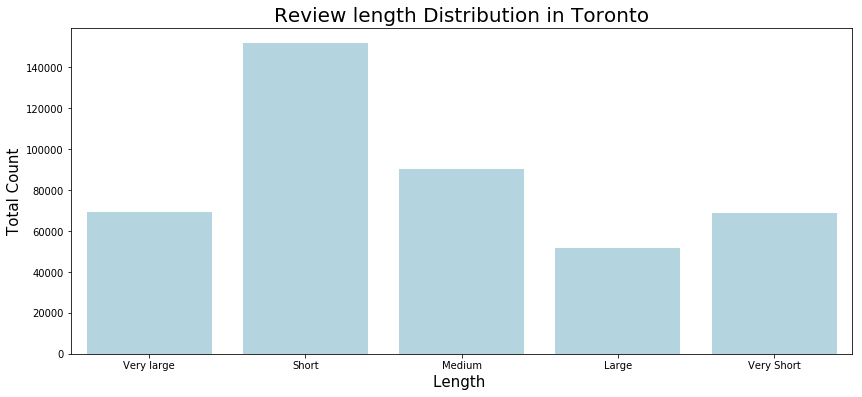

In [62]:

plt.figure(figsize=(14,6))

g = sns.countplot(x='length_cat', color='lightblue',
                  data=revf)
g.set_title("Review length Distribution in Toronto", fontsize=20)
g.set_xlabel("Length ", fontsize=15)
g.set_ylabel("Total Count", fontsize=15)

print('The average length of a review in Toronto is ', round(revf.length.mean()),' characters')
plt.show()

Text(0.5, 0, 'Months')

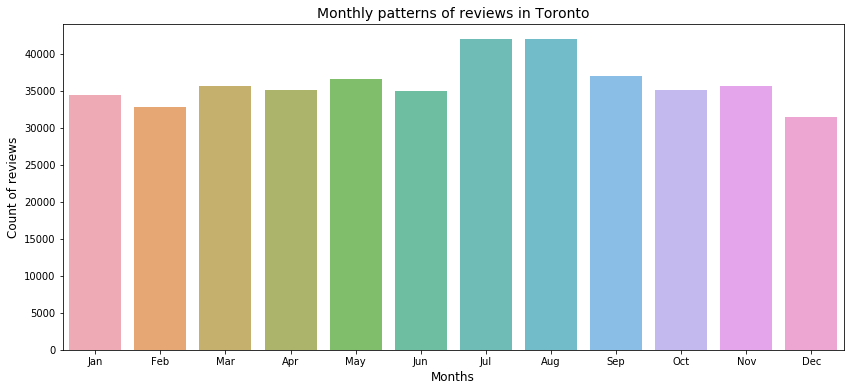

In [63]:
df_monthly_patterns = revf.copy(deep=True)
df_monthly_patterns['Month'] = df_monthly_patterns['date'].dt.strftime("%b")
df_monthly_patterns['Month_num'] = df_monthly_patterns['date'].dt.month
df_monthly_patterns = pd.DataFrame(df_monthly_patterns.groupby([ "Month", "Month_num"])["review_id"].agg(['count'])).reset_index()
df_monthly_patterns.sort_values(['Month_num'], inplace=True)

x = list(df_monthly_patterns['Month'])
y = list(df_monthly_patterns['count'])
plt.figure(figsize=(14,6))
sns.barplot(x, y, alpha=0.8)
plt.title("Monthly patterns of reviews in Toronto",fontsize=14)
plt.ylabel('Count of reviews', fontsize=12)
plt.xlabel('Months', fontsize=12)


### Basic stats for Phoenix's reviews

In [64]:
revfp.describe()

,cool,funny,stars,useful
count,1.442738e+06,1.442738e+06,1.442738e+06,1.442738e+06
mean,5.856462e-01,4.627507e-01,3.764311e+00,1.109385e+00
std,2.721573e+00,2.925666e+00,1.431209e+00,3.756368e+00
min,-1.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00
25%,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00
max,5.020000e+02,9.760000e+02,5.000000e+00,1.122000e+03


In [65]:
revf.isnull().sum()

business_id    0
cool           0
date           0
funny          0
review_id      0
stars          0
text           0
useful         0
user_id        0
length         0
length_cat     0
dtype: int64

In [66]:
revf.shape

(432479, 11)

### LENGTH DISTRIBUTION AND TEMPORAL PATTERNS IN THE REVIEWS OF PHOENIX

In [67]:
revfp['date']=pd.to_datetime(revfp['date'])

The average length of a review in Toronto is  523  characters


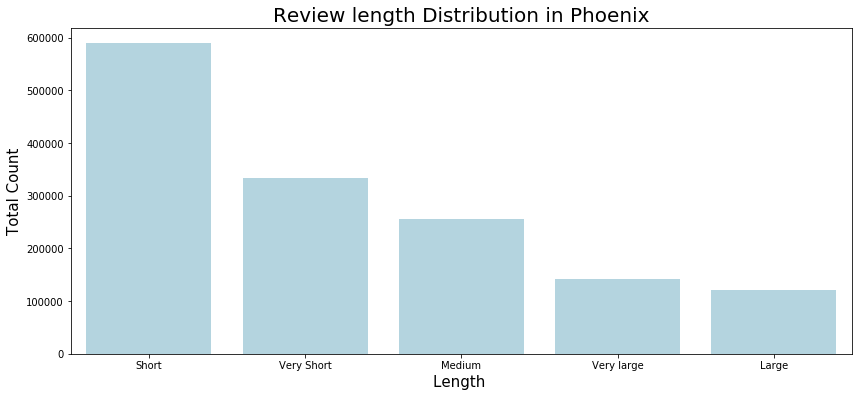

In [68]:
result = [] 
for value in revfp["text"]:
    result.append(len(value)) 
       
revfp["length"] = result  
revfp["length_cat"] = revfp["length"].apply(length)

plt.figure(figsize=(14,6))

g = sns.countplot(x='length_cat', color='lightblue',
                  data=revfp)
g.set_title("Review length Distribution in Phoenix", fontsize=20)
g.set_xlabel("Length ", fontsize=15)
g.set_ylabel("Total Count", fontsize=15)

print('The average length of a review in Toronto is ', round(revfp.length.mean()),' characters')
plt.show()

Text(0.5, 0, 'Months')

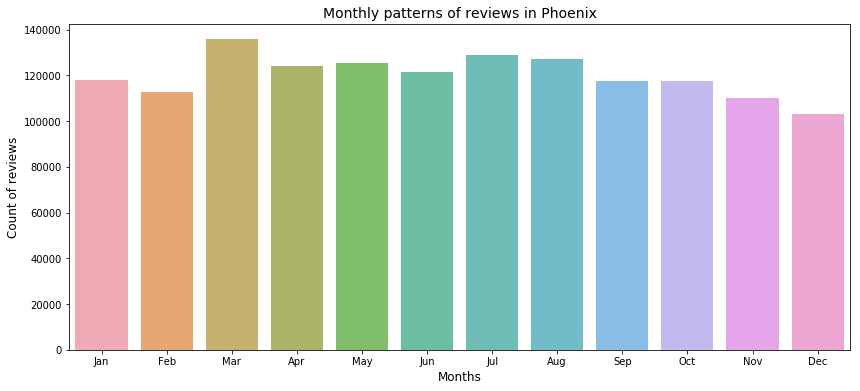

In [69]:
df_monthly_patterns = revfp.copy(deep=True)
df_monthly_patterns['Month'] = df_monthly_patterns['date'].dt.strftime("%b")
df_monthly_patterns['Month_num'] = df_monthly_patterns['date'].dt.month
df_monthly_patterns = pd.DataFrame(df_monthly_patterns.groupby([ "Month", "Month_num"])["review_id"].agg(['count'])).reset_index()
df_monthly_patterns.sort_values(['Month_num'], inplace=True)

x = list(df_monthly_patterns['Month'])
y = list(df_monthly_patterns['count'])
plt.figure(figsize=(14,6))
sns.barplot(x, y, alpha=0.8)
plt.title("Monthly patterns of reviews in Phoenix",fontsize=14)
plt.ylabel('Count of reviews', fontsize=12)
plt.xlabel('Months', fontsize=12)

Since we are going to focus our analysis on these two cites (Toronto and Phoenix), from these main distributions on the reviews datasets we can get some insights such as that the reviews average length in Toronto is larger than in Phoenix. That could indicate that users from Toronto take more interest in these Yelp's ratings than the ones in Phoenix.<br>

We can also see that the temporal patters are quite different. In Toronto there is a peak on number of reviews in summer whereas in Phoenix the peak is in March. That could be taking into account when oppening a new restaurant in any of these cities. In Toronto would be better right before summer to have more customers whereas in Phoenix, it would be better in January or February.